In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T17:26:06.374403+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4928395748138428}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003995418548583984}
!!! {"init_...": 0.0006220340728759766}
!!! {"ete3Tree": 0.6670422554016113}
!!! {"GenomeTree_hierarchical": 0.0029938220977783203}
!!! {"mutateBranchETEhierarchy": 0.09641122817993164}
!!! {"write_genome_short": 0.05076432228088379}


  4%|▎         | 7/193 [00:03<01:03,  2.92it/s]

!!! {"writeGenomeNoIndels": 0.1790323257446289}
!!! {"pl.DataFrame": 0.04652595520019531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0530948638916016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017225265502929688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00341033935546875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.0005083084106445312}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.0022077560424804688}
!!! {"mutateBranchETEhierarchy": 1.4781951904296875e-05}
!!! {"write_genome_short": 7.081031799316406e

 10%|▉         | 19/193 [00:03<00:16, 10.38it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004168510437011719}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010585784912109375}
!!! {"init_...": 0.00042176246643066406}
!!! {"ete3Tree": 0.0008294582366943359}
!!! {"GenomeTree_hierarchical": 0.0027632713317871094}
!!! {"mutateBranchETEhierarchy": 0.00013589859008789062}
!!! {"write_genome_short": 0.00014138221740722656}
!!! {"writeGenomeNoIndels": 0.00025725364685058594}
!!! {"pl.DataFrame": 0.0001277923583984375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0064983367919921875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0

 13%|█▎        | 25/193 [00:03<00:11, 14.54it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008325576782226562}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001266002655029297}
!!! {"init_...": 0.0004649162292480469}
!!! {"ete3Tree": 0.020247220993041992}
!!! {"GenomeTree_hierarchical": 0.0020334720611572266}
!!! {"mutateBranchETEhierarchy": 0.004981040954589844}
!!! {"write_genome_short": 0.0023453235626220703}
!!! {"writeGenomeNoIndels": 0.007997989654541016}
!!! {"pl.DataFrame": 0.0016798973083496094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.041692256927490234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00094866

 18%|█▊        | 35/193 [00:03<00:07, 22.05it/s]

!!! {"phastSimRun": 0.000148773193359375}
!!! {"init_...": 0.0006580352783203125}
!!! {"ete3Tree": 7.915496826171875e-05}
!!! {"GenomeTree_hierarchical": 0.002242565155029297}
!!! {"mutateBranchETEhierarchy": 1.5735626220703125e-05}
!!! {"write_genome_short": 7.128715515136719e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00012063980102539062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005660057067871094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032711029052734375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=60, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003451108932495117}
enter log_context_duration for _

 21%|██        | 41/193 [00:03<00:05, 25.82it/s]

!!! {"phastSimRun": 0.00013494491577148438}
!!! {"init_...": 0.0005564689636230469}
!!! {"ete3Tree": 8.654594421386719e-05}
!!! {"GenomeTree_hierarchical": 0.0021877288818359375}
!!! {"mutateBranchETEhierarchy": 1.3113021850585938e-05}
!!! {"write_genome_short": 0.00023102760314941406}
!!! {"writeGenomeNoIndels": 8.106231689453125e-06}
!!! {"pl.DataFrame": 9.512901306152344e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005606174468994141}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00023102760314941406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003259897232055664}
enter log_context_duration for

 27%|██▋       | 53/193 [00:04<00:03, 36.54it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.1457672119140625e-05}
len(phylogeny_df)=161, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004403829574584961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013589859008789062}
!!! {"init_...": 0.0004909038543701172}
!!! {"ete3Tree": 0.0011763572692871094}
!!! {"GenomeTree_hierarchical": 0.002920866012573242}
!!! {"mutateBranchETEhierarchy": 0.0003230571746826172}
!!! {"write_genome_short": 0.00020694732666015625}
!!! {"writeGenomeNoIndels": 0.0003833770751953125}
!!! {"pl.DataFrame": 0.00018334388732910156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007654666900634766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

 34%|███▎      | 65/193 [00:04<00:02, 45.24it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9788742065429688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003644227981567383}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001614093780517578}
!!! {"init_...": 0.00048351287841796875}
!!! {"ete3Tree": 8.082389831542969e-05}
!!! {"GenomeTree_hierarchical": 0.003260374069213867}
!!! {"mutateBranchETEhierarchy": 1.5497207641601562e-05}
!!! {"write_genome_short": 9.226799011230469e-05}
!!! {"writeGenomeNoIndels": 7.867813110351562e-06}
!!! {"pl.DataFrame": 0.00011372566223144531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006120204925537109}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00030

 40%|███▉      | 77/193 [00:04<00:02, 49.83it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2411346435546875e-05}
len(phylogeny_df)=228, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004789829254150391}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012993812561035156}
!!! {"init_...": 0.0004715919494628906}
!!! {"ete3Tree": 0.0016188621520996094}
!!! {"GenomeTree_hierarchical": 0.0030663013458251953}
!!! {"mutateBranchETEhierarchy": 0.0003619194030761719}
!!! {"write_genome_short": 0.00023674964904785156}
!!! {"writeGenomeNoIndels": 0.0005660057067871094}
!!! {"pl.DataFrame": 0.00021839141845703125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.008331775665283203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 43%|████▎     | 83/193 [00:04<00:02, 38.84it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.86102294921875e-05}
len(phylogeny_df)=3468, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008782148361206055}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013589859008789062}
!!! {"init_...": 0.0004591941833496094}
!!! {"ete3Tree": 0.021286964416503906}
!!! {"GenomeTree_hierarchical": 0.002162456512451172}
!!! {"mutateBranchETEhierarchy": 0.0047566890716552734}
!!! {"write_genome_short": 0.0025839805603027344}
!!! {"writeGenomeNoIndels": 0.008577585220336914}
!!! {"pl.DataFrame": 0.0016901493072509766}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04351353645324707}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001003503

 49%|████▊     | 94/193 [00:05<00:02, 40.34it/s]

!!! {"phastSimRun": 0.00012683868408203125}
!!! {"init_...": 0.00043463706970214844}
!!! {"ete3Tree": 7.081031799316406e-05}
!!! {"GenomeTree_hierarchical": 0.0021207332611083984}
!!! {"mutateBranchETEhierarchy": 1.239776611328125e-05}
!!! {"write_genome_short": 6.866455078125e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 8.177757263183594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005629777908325195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020575523376464844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003076314926147461}
enter log_context_duration for _do

 54%|█████▍    | 104/193 [00:05<00:02, 42.91it/s]

!!! {"write_genome_short": 0.0005805492401123047}
!!! {"writeGenomeNoIndels": 8.106231689453125e-06}
!!! {"pl.DataFrame": 0.00010824203491210938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005475282669067383}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00028228759765625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032303333282470703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012993812561035156}
!!! {"init_...": 0.0004367828369140625}
!!! {"ete3Tree": 9.799003601074219e-05}
!!! {"GenomeTree_hierarchical": 0.0028867721557617188}
!!! {"mutateBranchETEhierarchy": 1.478195

 57%|█████▋    | 110/193 [00:05<00:01, 45.26it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.86102294921875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035462379455566406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001323223114013672}
!!! {"init_...": 0.0004489421844482422}
!!! {"ete3Tree": 6.985664367675781e-05}
!!! {"GenomeTree_hierarchical": 0.0029015541076660156}
!!! {"mutateBranchETEhierarchy": 1.2636184692382812e-05}
!!! {"write_genome_short": 0.00020647048950195312}
!!! {"writeGenomeNoIndels": 8.106231689453125e-06}
!!! {"pl.DataFrame": 0.00010061264038085938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005662679672241211}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025

 63%|██████▎   | 121/193 [00:05<00:01, 48.19it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004719972610473633}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015044212341308594}
!!! {"init_...": 0.00045013427734375}
!!! {"ete3Tree": 0.004216194152832031}
!!! {"GenomeTree_hierarchical": 0.002025604248046875}
!!! {"mutateBranchETEhierarchy": 0.00070953369140625}
!!! {"write_genome_short": 0.0005435943603515625}
!!! {"writeGenomeNoIndels": 0.0012738704681396484}
!!! {"pl.DataFrame": 0.00034618377685546875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011558055877685547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037217140197753906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newi

 68%|██████▊   | 132/193 [00:05<00:01, 50.90it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036225318908691406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.0005023479461669922}
!!! {"ete3Tree": 7.867813110351562e-05}
!!! {"GenomeTree_hierarchical": 0.002249479293823242}
!!! {"mutateBranchETEhierarchy": 1.4543533325195312e-05}
!!! {"write_genome_short": 0.0001499652862548828}
!!! {"writeGenomeNoIndels": 7.62939453125e-06}
!!! {"pl.DataFrame": 0.00012230873107910156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005150556564331055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003352165

 75%|███████▍  | 144/193 [00:06<00:00, 54.94it/s]

!!! {"phastSimRun": 0.0001442432403564453}
!!! {"init_...": 0.0006544589996337891}
!!! {"ete3Tree": 0.00020766258239746094}
!!! {"GenomeTree_hierarchical": 0.0024230480194091797}
!!! {"mutateBranchETEhierarchy": 4.696846008300781e-05}
!!! {"write_genome_short": 8.845329284667969e-05}
!!! {"writeGenomeNoIndels": 5.5789947509765625e-05}
!!! {"pl.DataFrame": 0.00012135505676269531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006087779998779297}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00029921531677246094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031876564025878906}
enter log_context_duration fo

 78%|███████▊  | 150/193 [00:06<00:01, 41.33it/s]

!!! {"writeGenomeNoIndels": 0.01178288459777832}
!!! {"pl.DataFrame": 0.0022792816162109375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.056227684020996094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00152587890625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009569883346557617}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001456737518310547}
!!! {"init_...": 0.0005025863647460938}
!!! {"ete3Tree": 0.024245738983154297}
!!! {"GenomeTree_hierarchical": 0.002170085906982422}
!!! {"mutateBranchETEhierarchy": 0.006243228912353516}
!!! {"write_genome_short": 0.00321817398071

 80%|████████  | 155/193 [00:06<00:00, 41.63it/s]

!!! {"ete3Tree": 0.014884471893310547}
!!! {"GenomeTree_hierarchical": 0.002675771713256836}
!!! {"mutateBranchETEhierarchy": 0.0035076141357421875}
!!! {"write_genome_short": 0.0017290115356445312}
!!! {"writeGenomeNoIndels": 0.005741596221923828}
!!! {"pl.DataFrame": 0.0011610984802246094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03211545944213867}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007915496826171875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031714439392089844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013780593872070312}
!!! {"init_...": 0.000477313

 83%|████████▎ | 160/193 [00:07<00:03, 10.17it/s]

!!! {"mutateBranchETEhierarchy": 0.04714822769165039}
!!! {"write_genome_short": 0.02436232566833496}
!!! {"writeGenomeNoIndels": 0.0761556625366211}
!!! {"pl.DataFrame": 0.012768745422363281}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3384246826171875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005997419357299805}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003202199935913086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014019012451171875}
!!! {"init_...": 0.00046133995056152344}
!!! {"ete3Tree": 8.749961853027344e-05}
!!! {"GenomeTree_hierarchical": 0.0022807121276855

 85%|████████▌ | 165/193 [00:07<00:02, 12.99it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8133392333984375e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005774259567260742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001285076141357422}
!!! {"init_...": 0.0004780292510986328}
!!! {"ete3Tree": 0.009253740310668945}
!!! {"GenomeTree_hierarchical": 0.0020656585693359375}
!!! {"mutateBranchETEhierarchy": 0.002095460891723633}
!!! {"write_genome_short": 0.0011644363403320312}
!!! {"writeGenomeNoIndels": 0.0035293102264404297}
!!! {"pl.DataFrame": 0.0007429122924804688}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02108931541442871}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005874

 92%|█████████▏| 177/193 [00:08<00:00, 19.64it/s]

!!! {"ete3Tree": 0.0643305778503418}
!!! {"GenomeTree_hierarchical": 0.0022199153900146484}
!!! {"mutateBranchETEhierarchy": 0.017496347427368164}
!!! {"write_genome_short": 0.008565187454223633}
!!! {"writeGenomeNoIndels": 0.02596735954284668}
!!! {"pl.DataFrame": 0.0047342777252197266}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.1261751651763916}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024344921112060547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032906532287597656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013947486877441406}
!!! {"init_...": 0.0004897117614746

 94%|█████████▍| 182/193 [00:08<00:00, 23.16it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0060613155364990234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014519691467285156}
!!! {"init_...": 0.0005035400390625}
!!! {"ete3Tree": 0.008786916732788086}
!!! {"GenomeTree_hierarchical": 0.0028791427612304688}
!!! {"mutateBranchETEhierarchy": 0.0022258758544921875}
!!! {"write_genome_short": 0.0012600421905517578}
!!! {"writeGenomeNoIndels": 0.003697633743286133}
!!! {"pl.DataFrame": 0.0008044242858886719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022063493728637695}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000676631

100%|██████████| 193/193 [00:08<00:00, 22.04it/s]

!!! {"mutateBranchETEhierarchy": 0.008055925369262695}
!!! {"write_genome_short": 0.003972291946411133}
!!! {"writeGenomeNoIndels": 0.01190042495727539}
!!! {"pl.DataFrame": 0.002320528030395508}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06124377250671387}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013439655303955078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003228425979614258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014519691467285156}
!!! {"init_...": 0.0005049705505371094}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.002242803573

exit log_context_duration for extract variant
!!! {"extract variant": 0.09770846366882324}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26552867889404297}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03922152519226074}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0029916763305664062}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03378462791442871}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021648406982421875}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002656698226928711}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.0332491397857666}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003043651580810547}
enter log_context_duration for seq_a

 43%|████▎     | 3/7 [00:00<00:00, 22.21it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.034253597259521484}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035622119903564453}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0028984546661376953}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.337860107421875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033504486083984375}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.00344085693359375}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0037314891815185547}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

100%|██████████| 7/7 [00:00<00:00, 22.43it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.003070831298828125}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.00331878662109375}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.044091224670410156}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003801584243774414}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0016286373138427734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.021330833435058594}
enter log_context_duration for res.collect
exit log_context_duration for res.co

exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.4180793762207031}
sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.285320520401001}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.19it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.376324892044067}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 592.42it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 145.5960943698883}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07005524635314941}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 208.9524495601654}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.00940251350402832}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003559589385986328}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00040435791015625}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003943443298339844}
ancestral_seque


100%|██████████| 368/368 [00:00<00:00, 292940.57it/s]

process mutations:   0%|          | 1/368 [00:00<01:19,  4.61it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:31,  2.42s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.7s



process mutations:  13%|█▎        | 48/368 [01:13<08:00,  1.50s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.4min



process mutations:  24%|██▍       | 88/368 [02:08<06:39,  1.43s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.4min



process mutations:  35%|███▍      | 128/368 [03:06<05:45,  1.44s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.3min



process mutations:  46%|████▌     | 168/368 [03:58<04:36,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.2min



process mutations:  57%|█████▋    | 208/368 [04:50<03:36,  1.35s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.2min



process mutations:  67%|██████▋   | 248/368 [05:45<02:43,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.1min



process mutations:  78%|███████▊  | 288/368 [06:41<01:49,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.0min



process mutations:  89%|████████▉ | 328/368 [07:33<00:53,  1.35s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.9min



process mutations: 100%|██████████| 368/368 [08:30<00:00,  1.39s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.5min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.7min finished


process replicate: 100%|██████████| 1/1 [12:19<00:00, 739.21s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.12701749801635742}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 114
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'ac55160f-9dbc-8d96-bf4b-427531f3fb96', 'ac55160f-9dbc-8d96-bf4b-427531f3fb96', 'ac55160f-9dbc-8d96-bf4b-427531
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


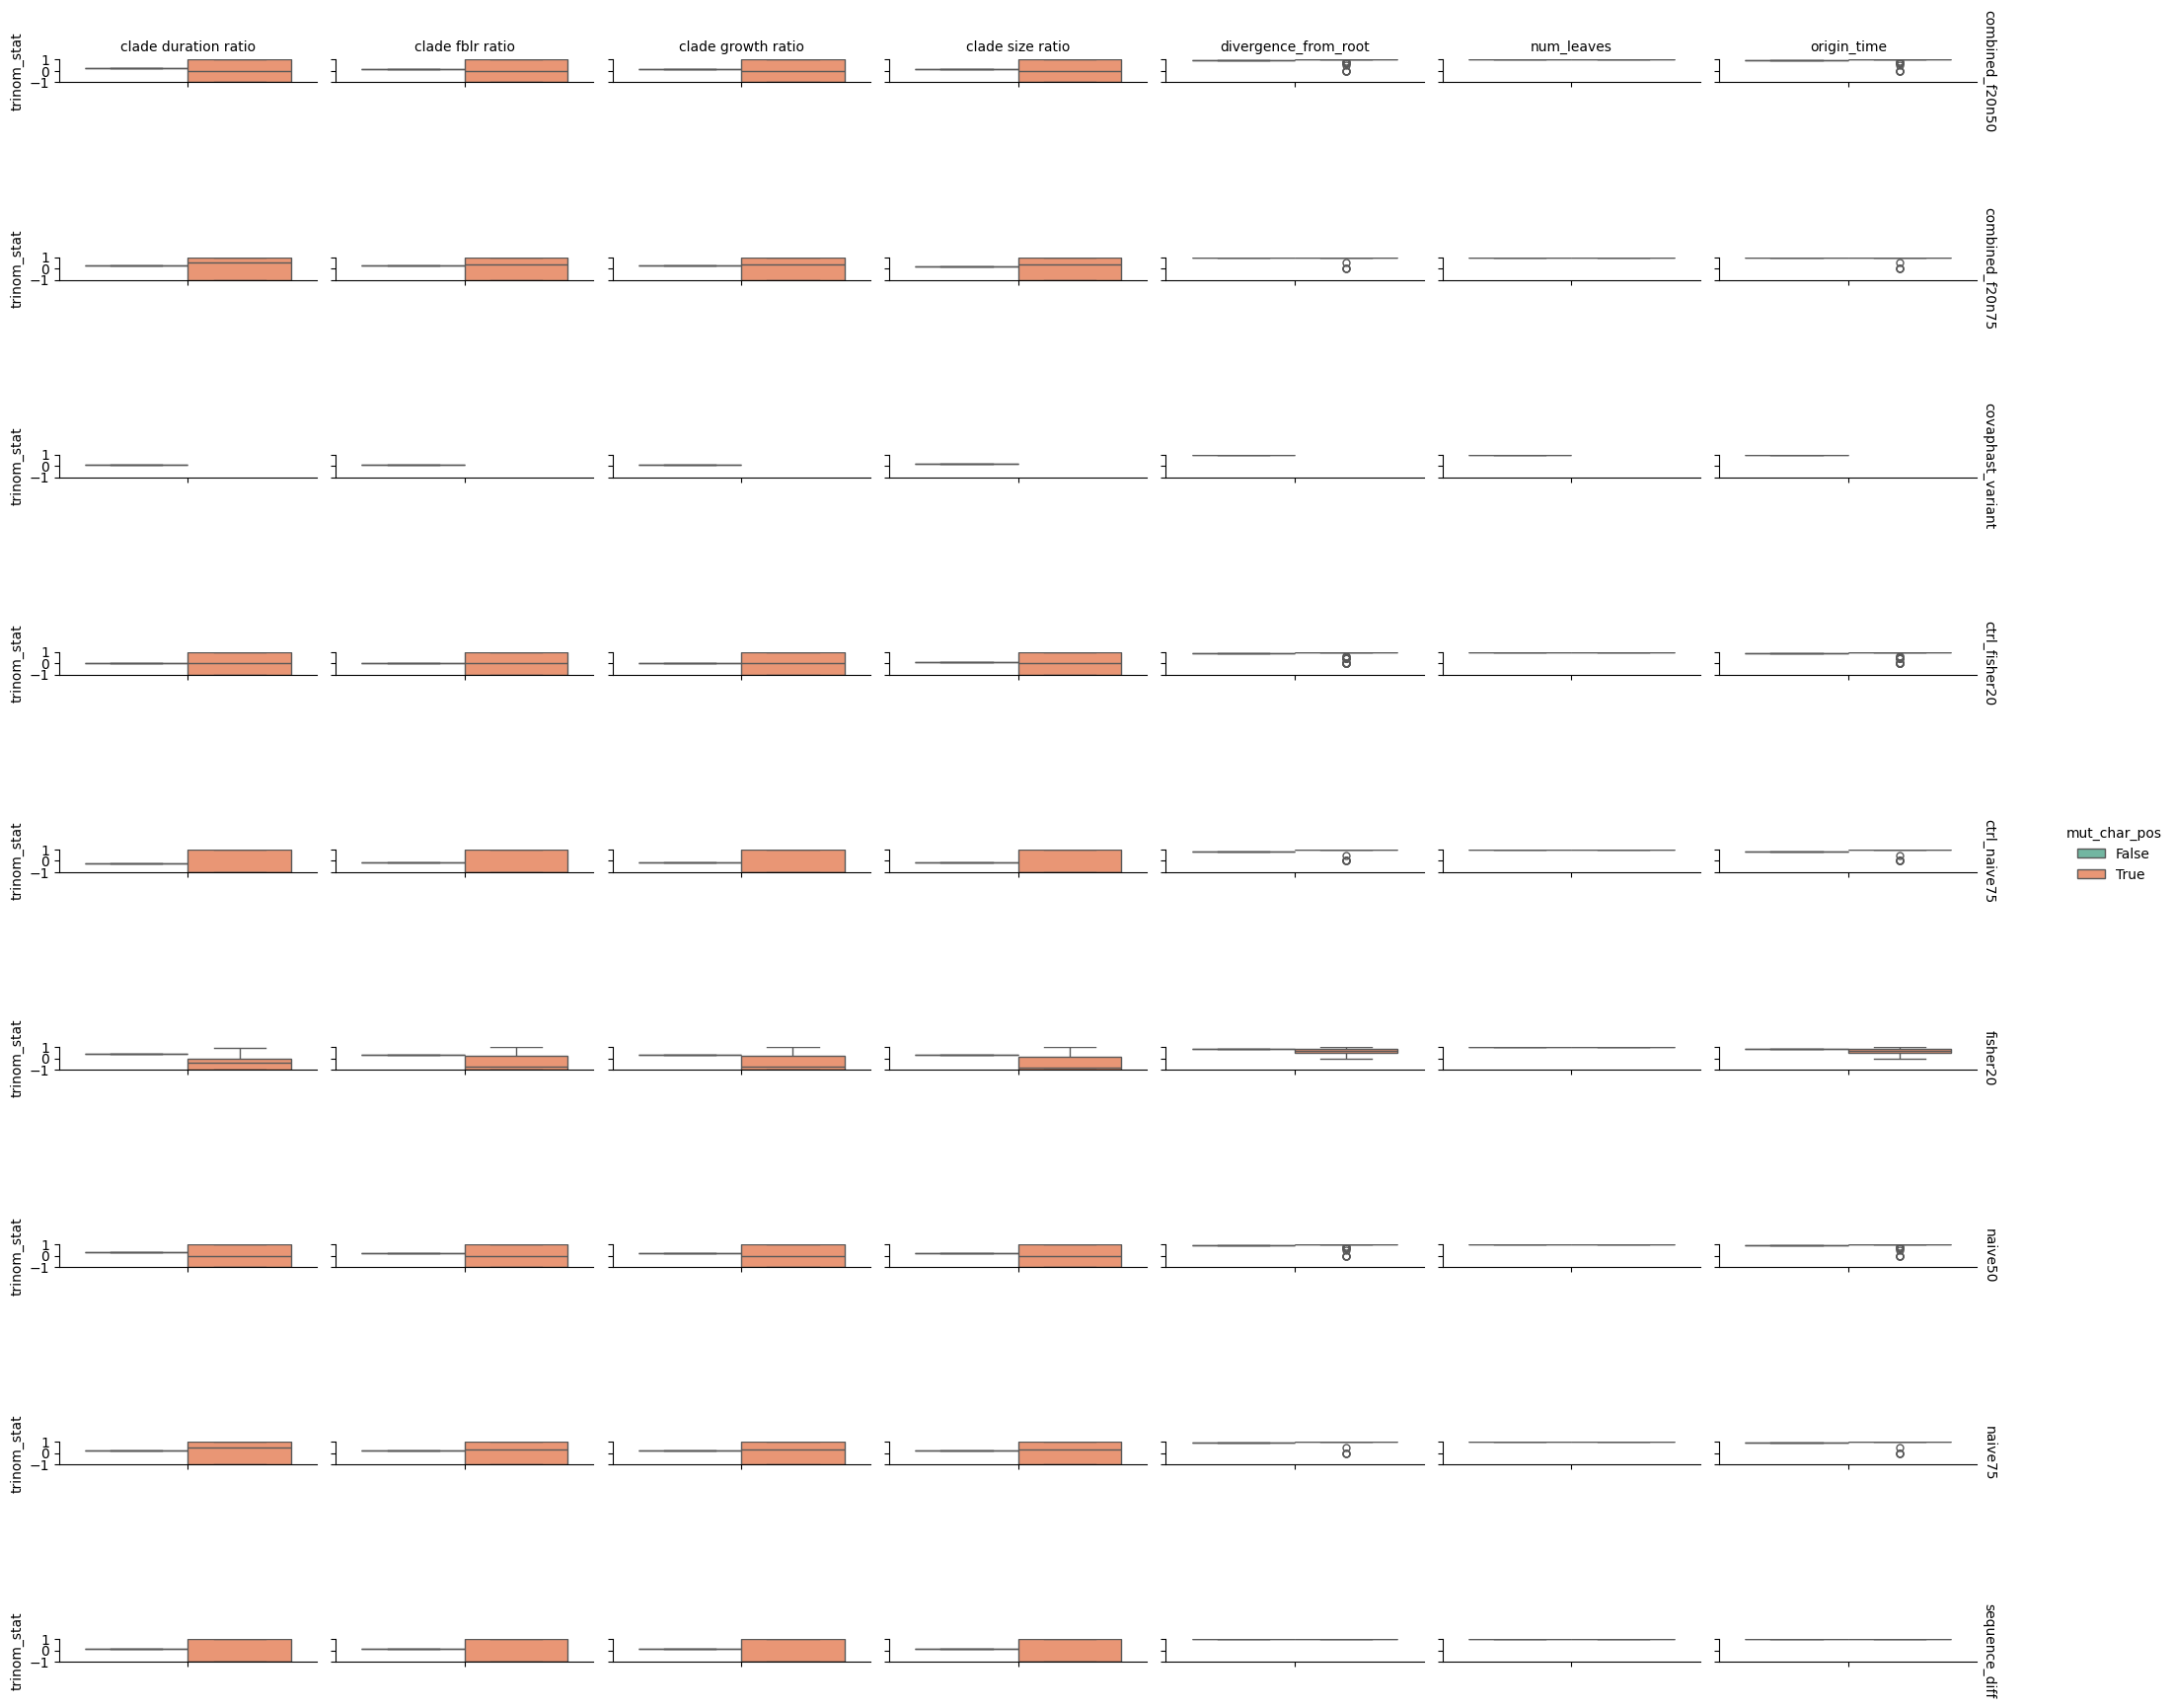

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


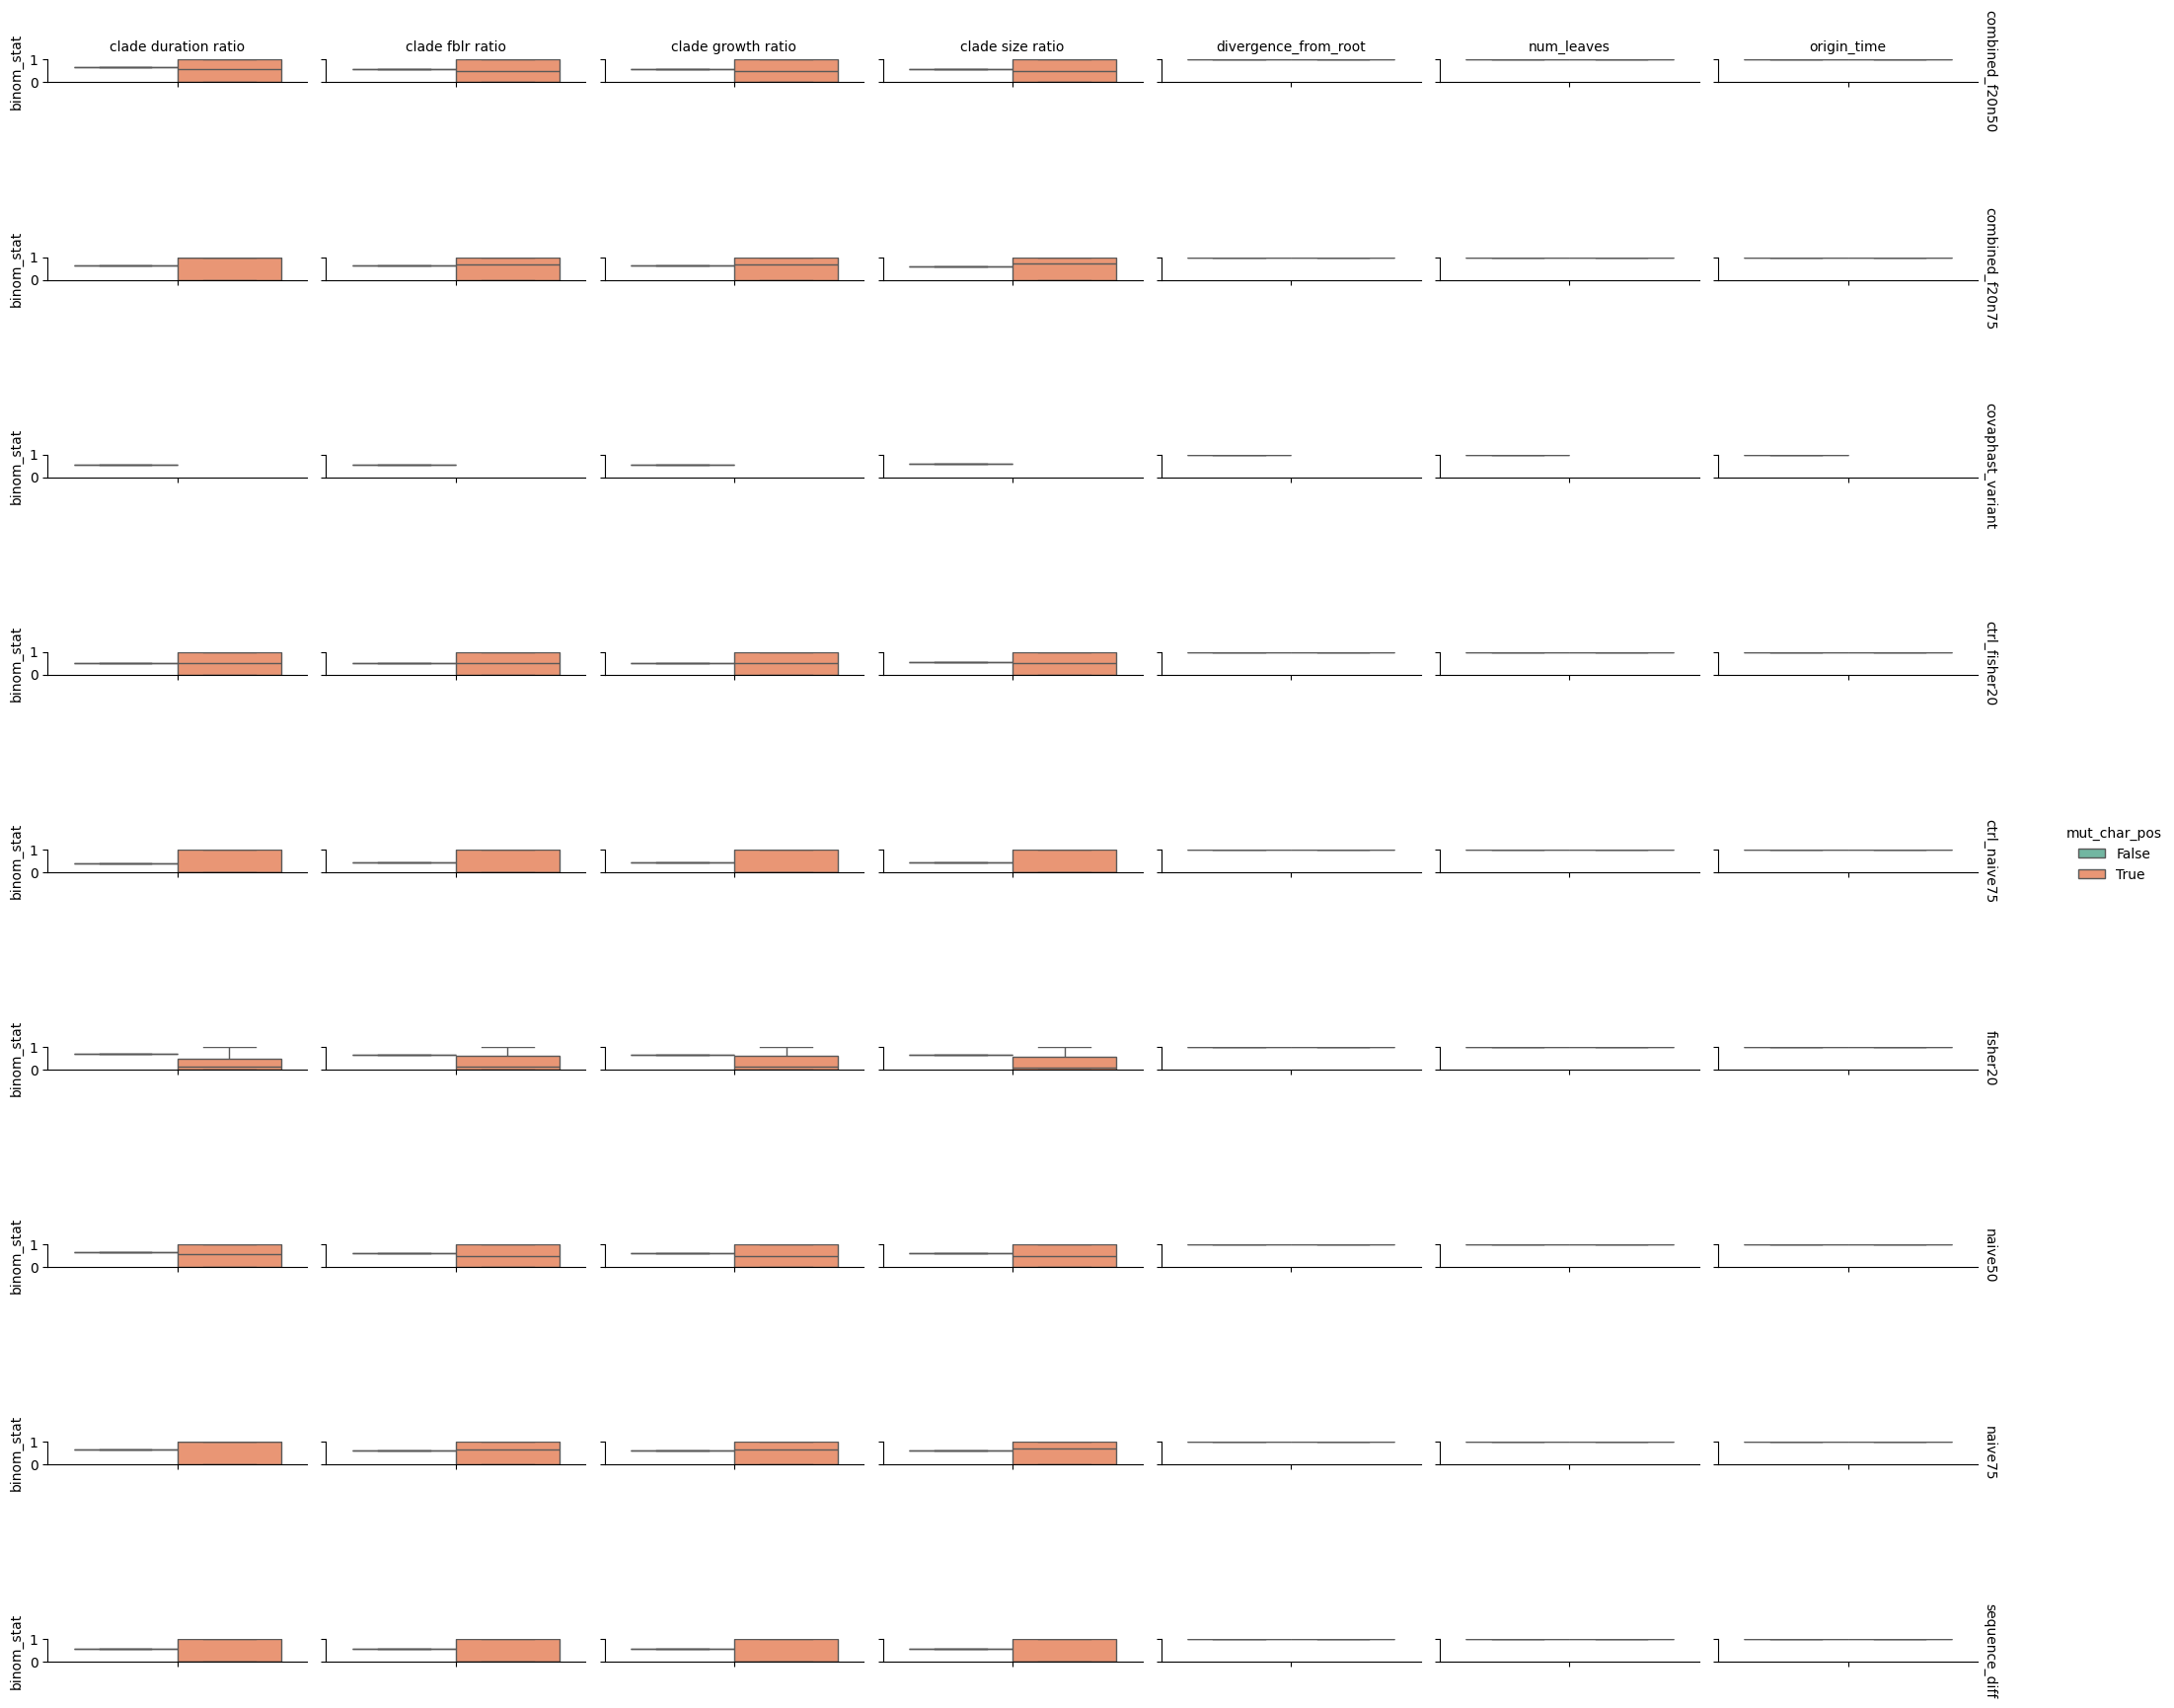

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


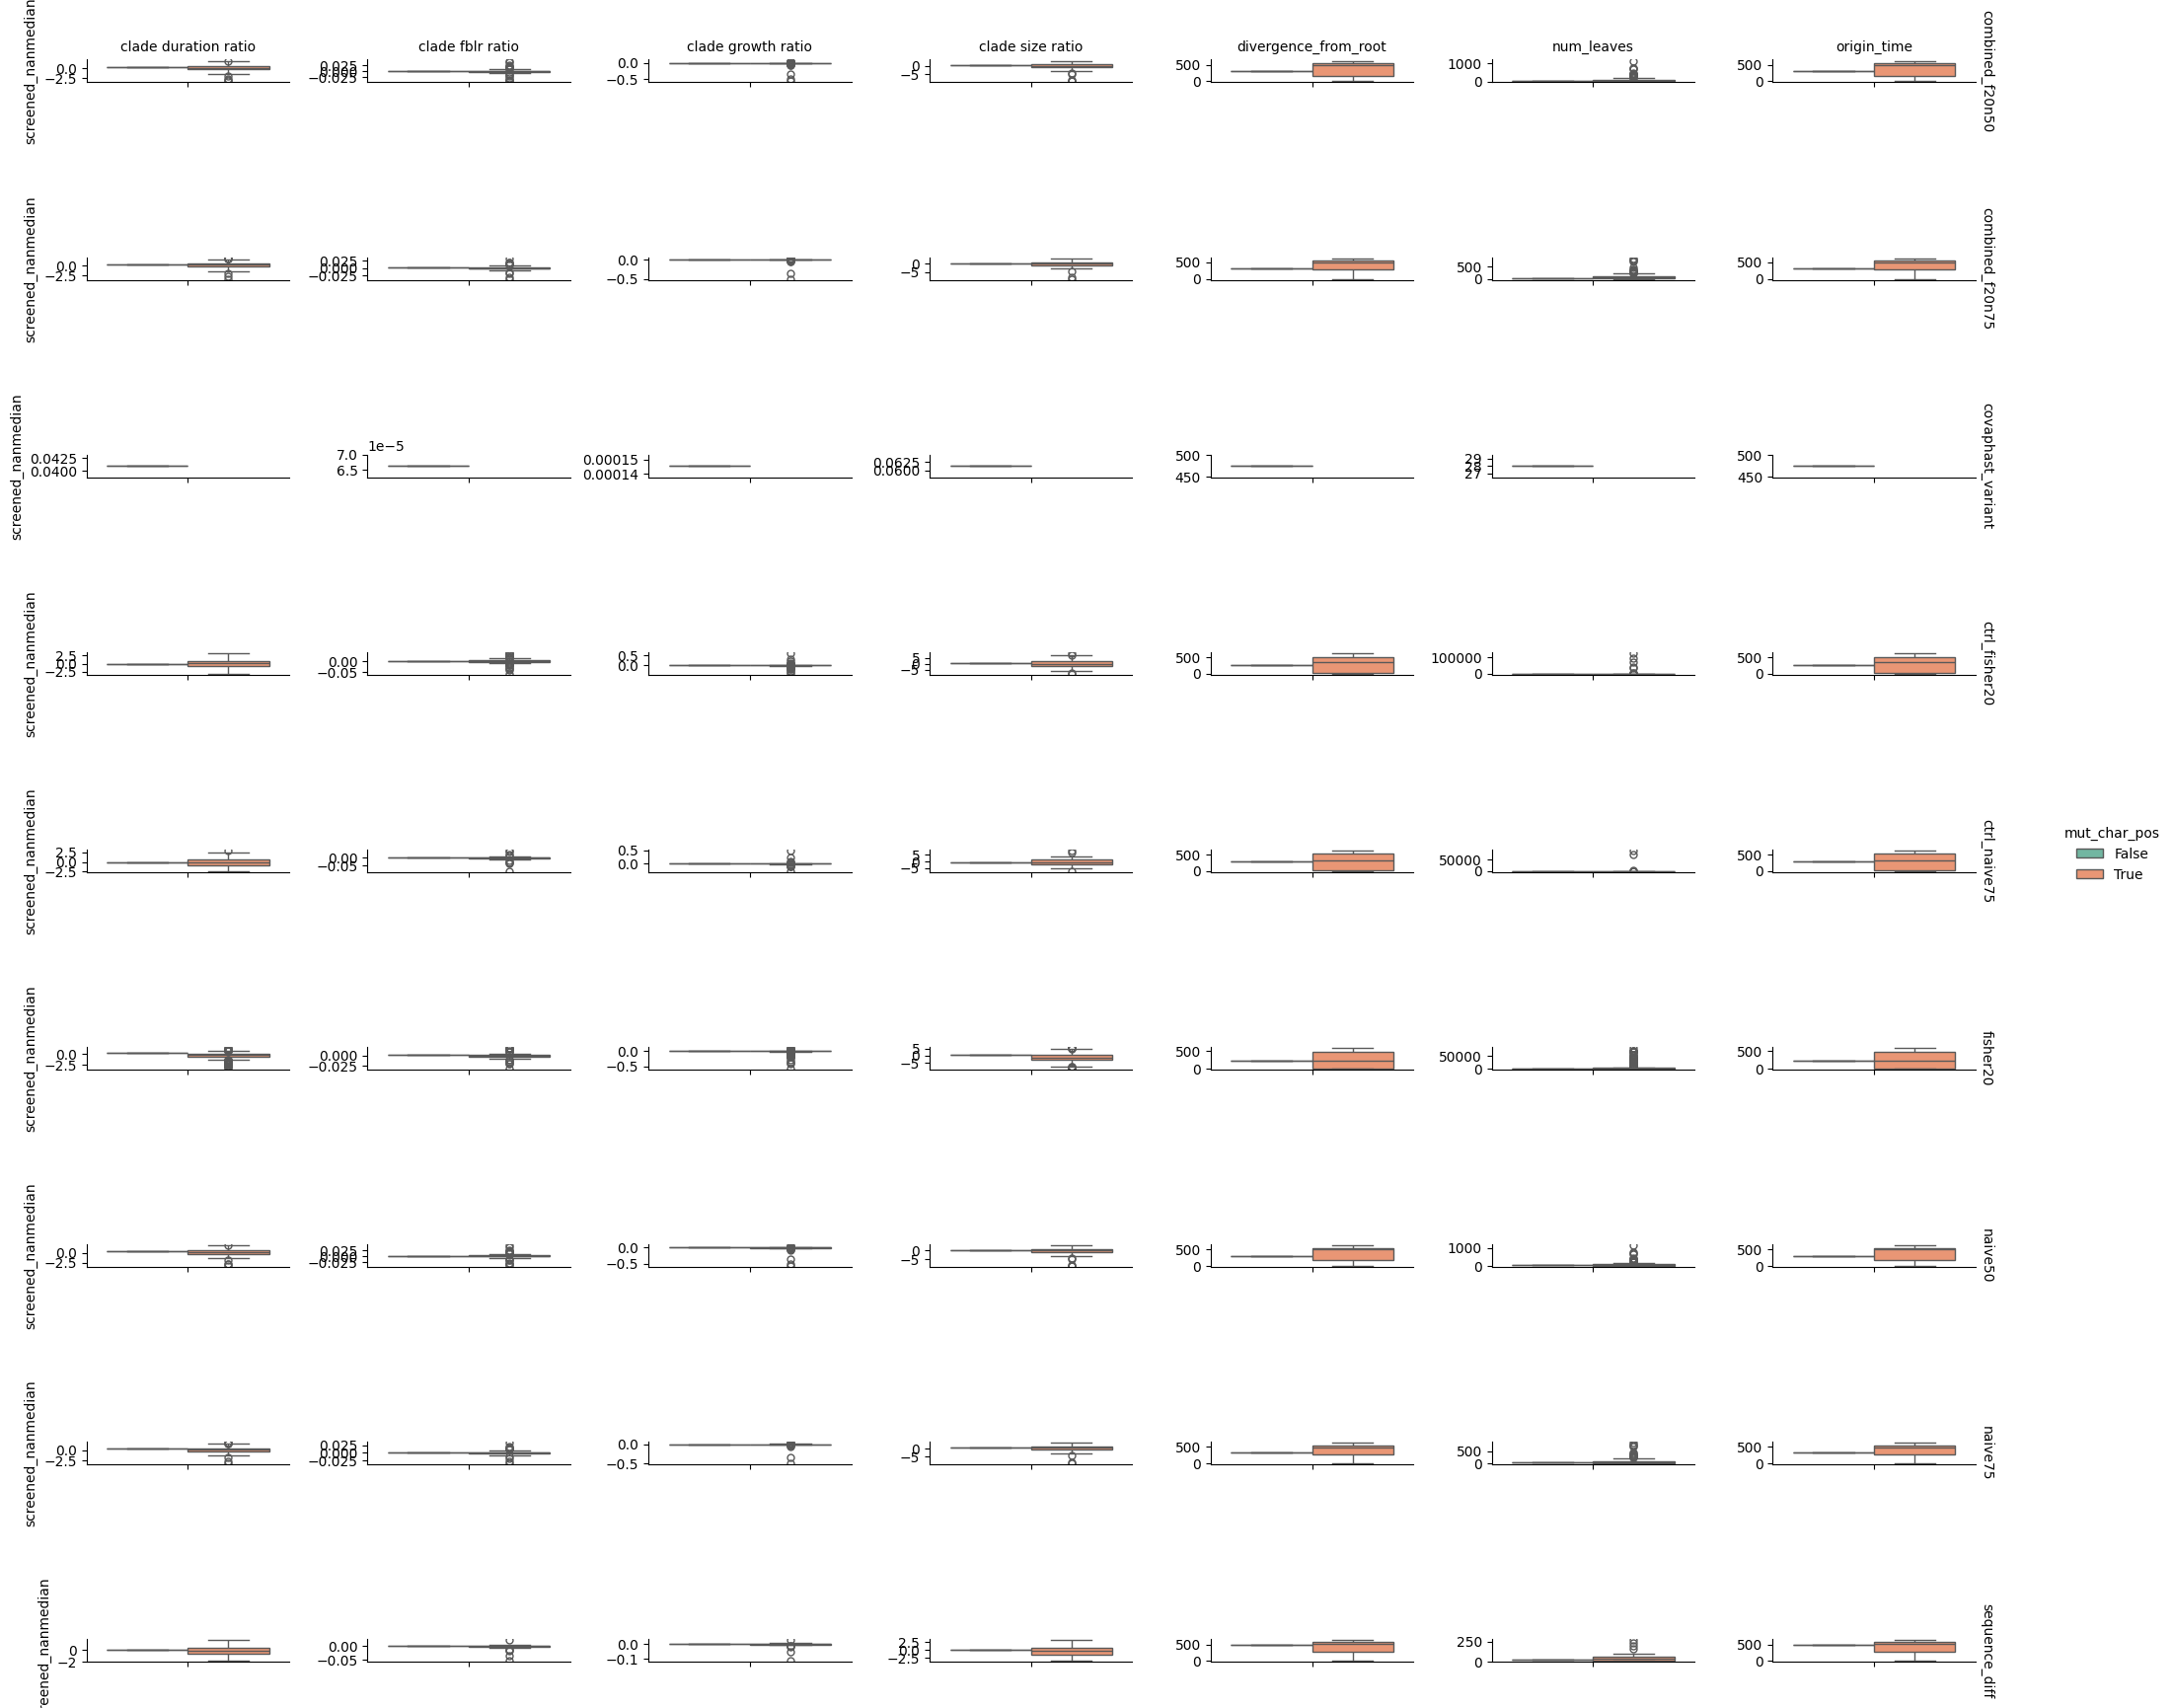

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


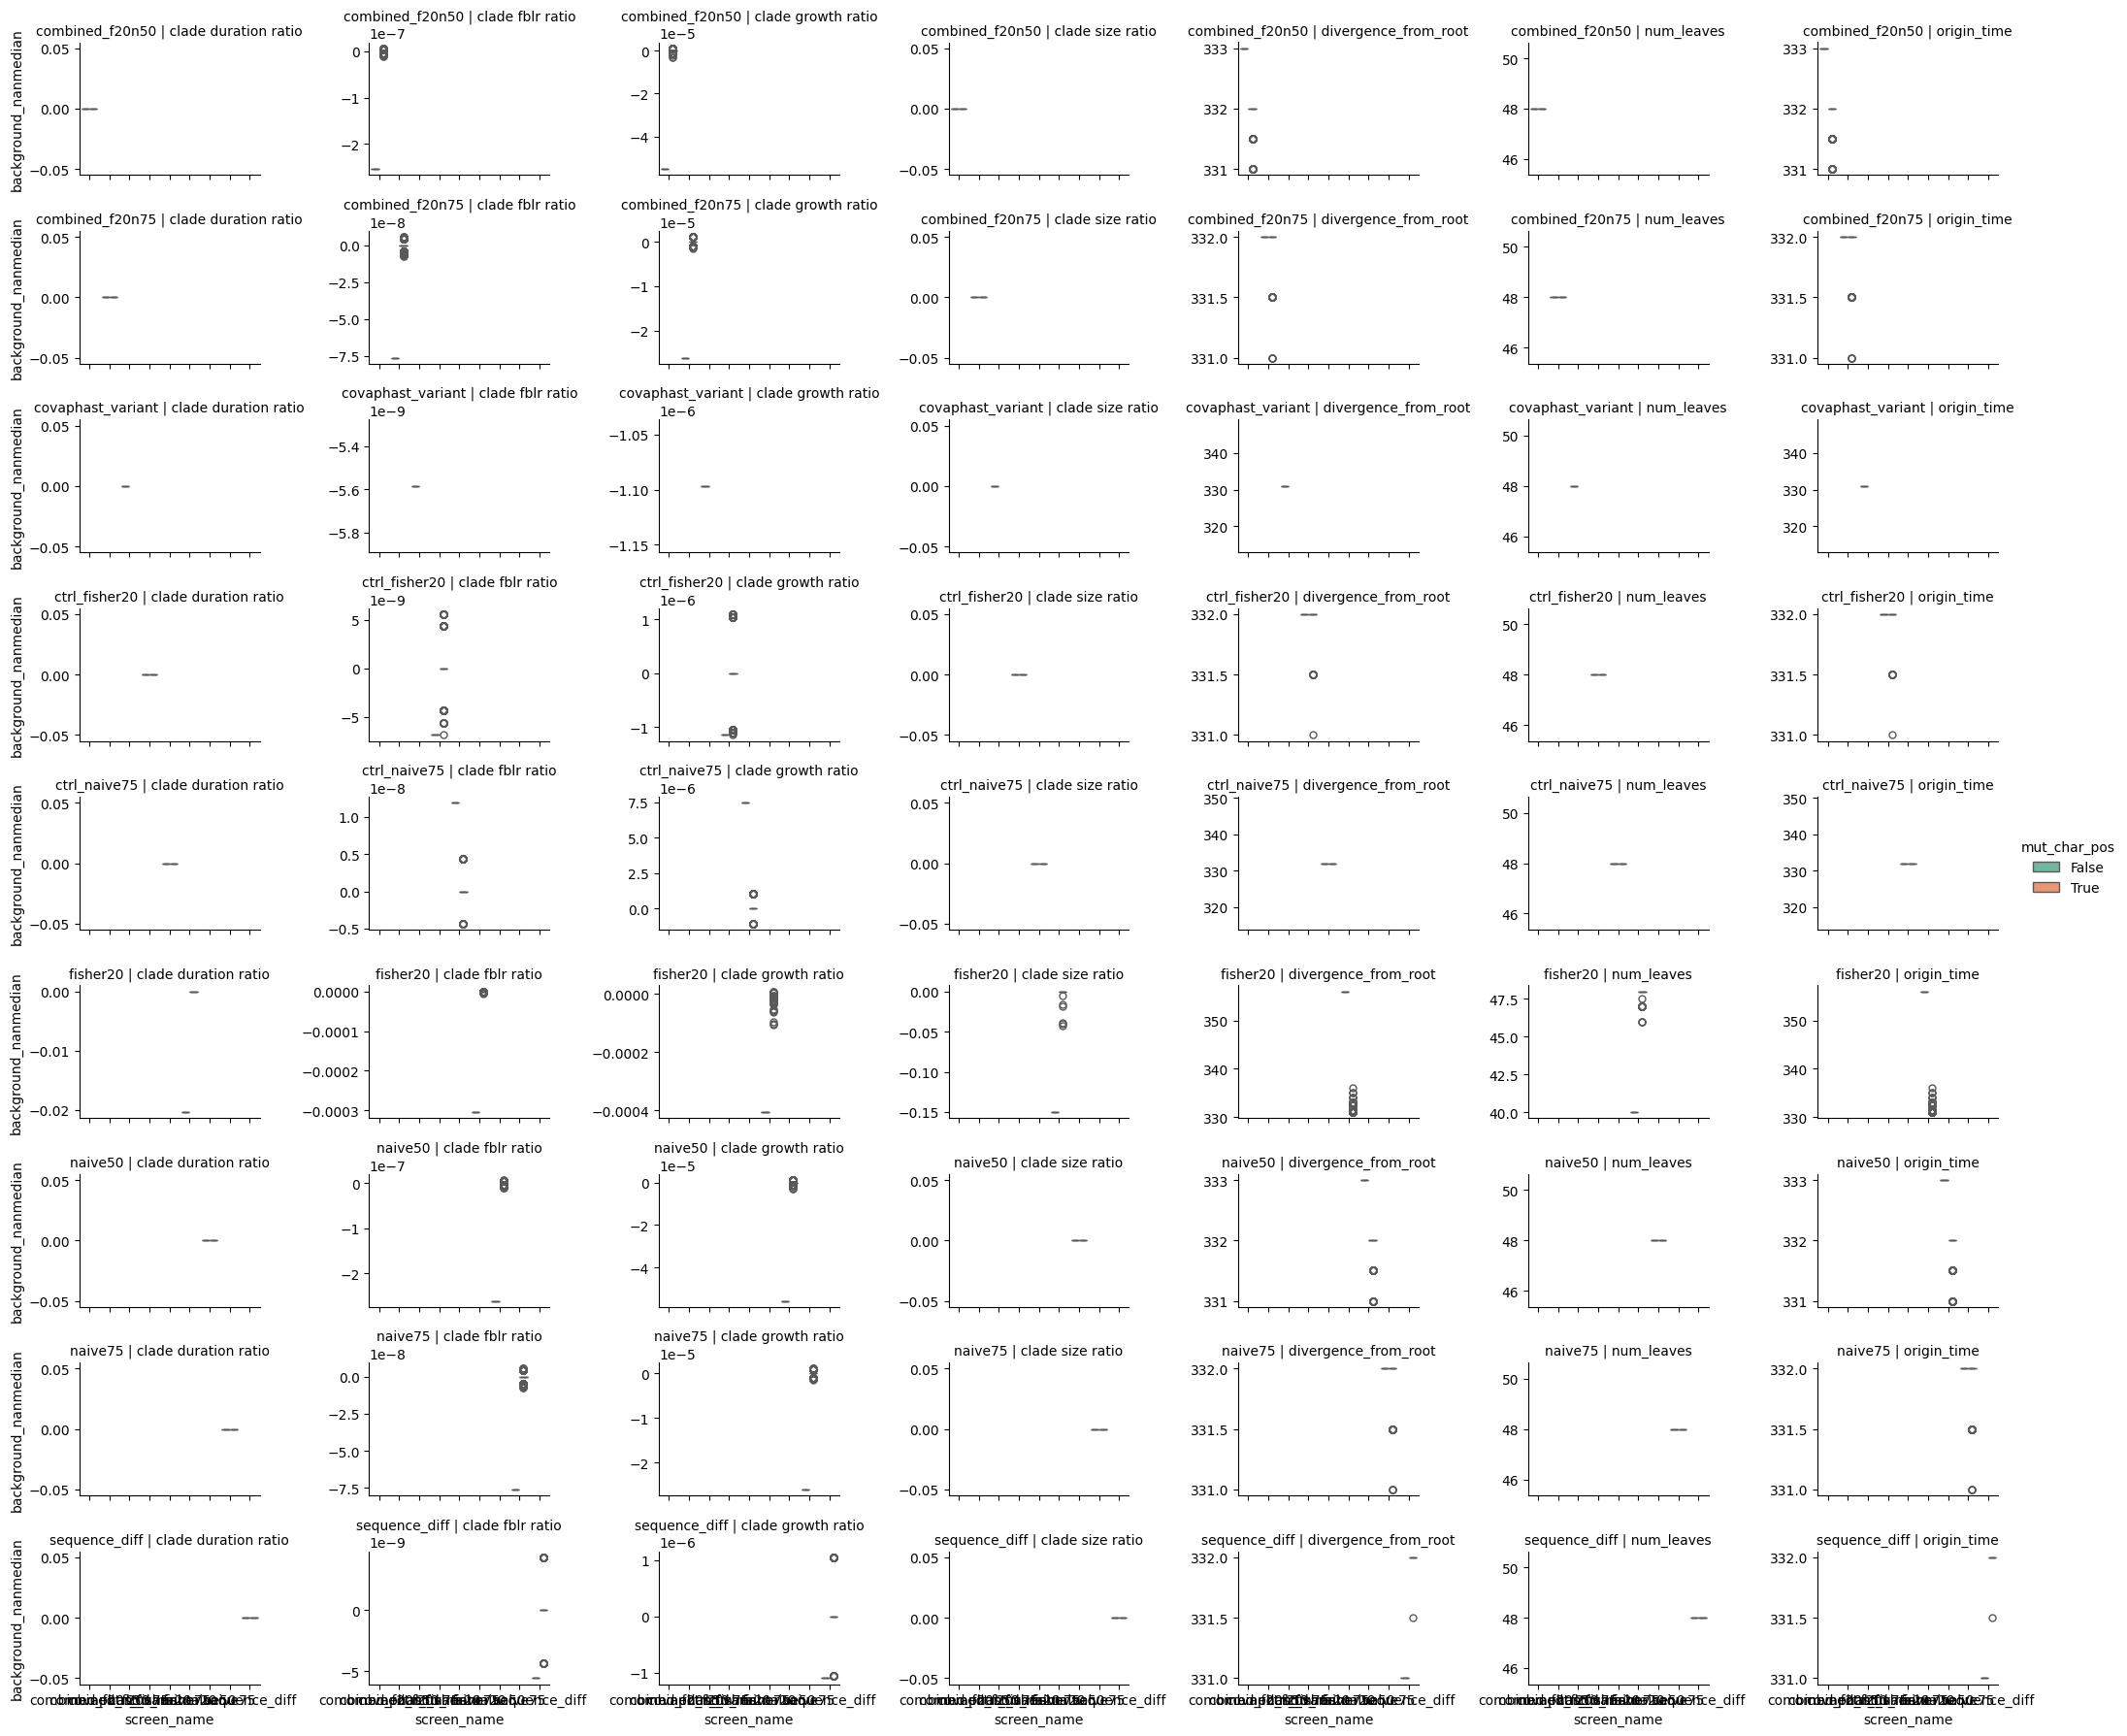

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
